In [ ]:
import numpy as np
from skimage import io
import cv2
import matplotlib.pyplot as plt

In [ ]:
url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
image = io.imread(url, as_gray=True)

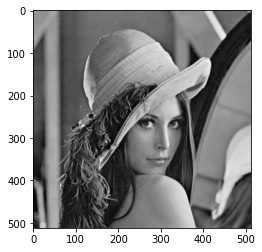

In [ ]:
plt.imshow(image, cmap = plt.get_cmap(name = 'gray'))

In [ ]:
def compute_number_of_iteration(shape):
    """
    Compute number of iteration in image pyramid 
    as function of base image shape (OpenCV default)
    """
    return int(round(np.log(min(shape)) / np.log(2) - 1))
    

def get_multiscale_features(image):
    pyramid = []
    pyramid_shape = image.shape
    for it in range(compute_number_of_iteration(image.shape)):
        I1 = cv2.GaussianBlur(image, (3, 3), cv2.BORDER_DEFAULT)
        I2 = cv2.GaussianBlur(image, (5, 5), cv2.BORDER_DEFAULT)
        I3 = cv2.GaussianBlur(image, (7, 7), cv2.BORDER_DEFAULT)
        I4 = cv2.GaussianBlur(image, (11, 11), cv2.BORDER_DEFAULT)

        DI1 = I1 - I2
        DI2 = I2 - I3
        DI3 = I3 - I4

        pyramid_shape = image.shape[0]//2, image.shape[1]//2
        pyramid.append([DI1, DI2, DI3])
        image = cv2.resize(image, pyramid_shape, interpolation = cv2.INTER_AREA)
    
    return pyramid

In [ ]:
def visualize(**images):
    """
    PLot images in one row.
    Parameters
    ----------
    **images : ndarray
        Images sent for plotting.
        input image, ground_truth, generated_mask
    """
    n = len(images)
    plt.figure(figsize=(12, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([]) 
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image, cmap = plt.get_cmap(name = 'gray'))
    plt.show()

In [ ]:
fs = get_multiscale_features(image)

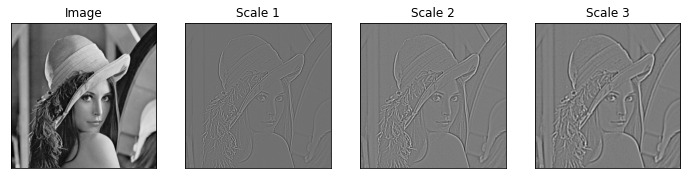

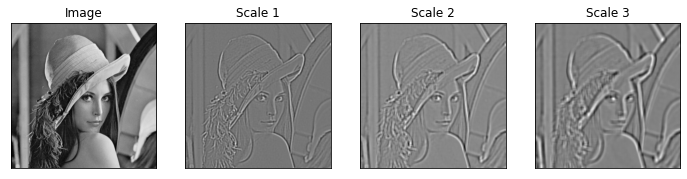

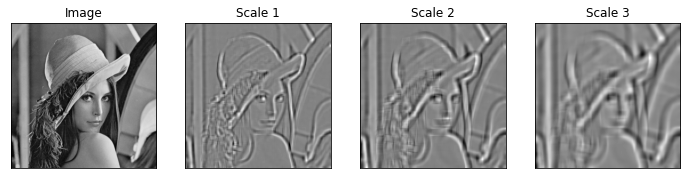

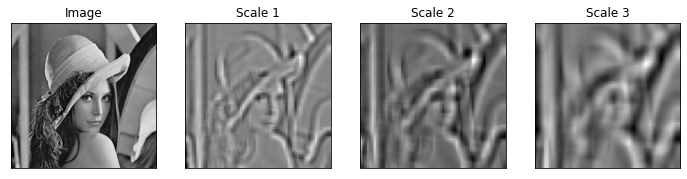

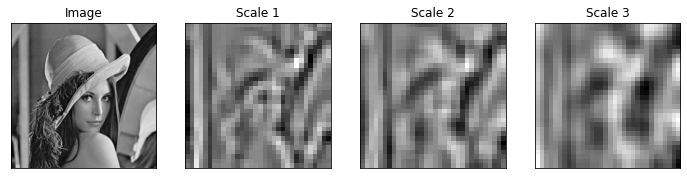

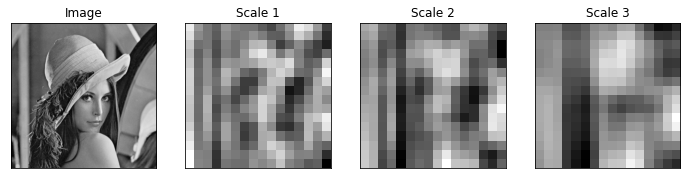

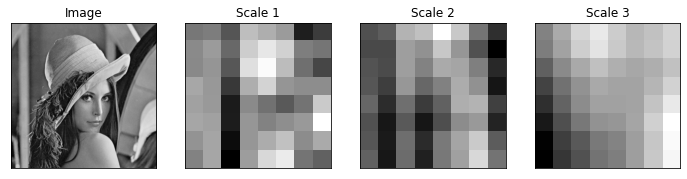

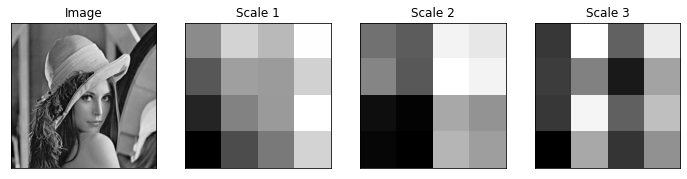

In [ ]:
for i in range(len(fs)):    
    visualize(
        image=image,
        scale_1=fs[i][0],
        scale_2=fs[i][1],
        scale_3=fs[i][2],
    )